<a href="https://colab.research.google.com/github/riyaz7781/riyaz7781/blob/main/SLR(Question_2)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sa

Load Dataset

In [67]:
data1=pd.read_csv("/content/Salary_Data.csv")
data1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Basic EDA and Data Visualisation

In [68]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


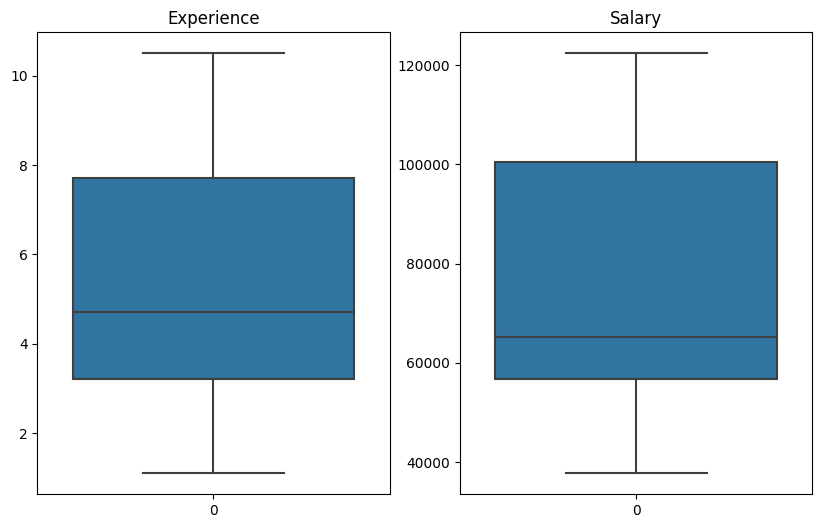

In [69]:
plt.subplots(figsize=(10,6))
plt.subplot(121)
sns.boxplot(data1["YearsExperience"])
plt.title("Experience")
plt.subplot(122)
sns.boxplot(data1["Salary"])
plt.title("Salary")
plt.show()

As we can observe that there is no outliers in the data

**Correlation** **Analysis**

In [70]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


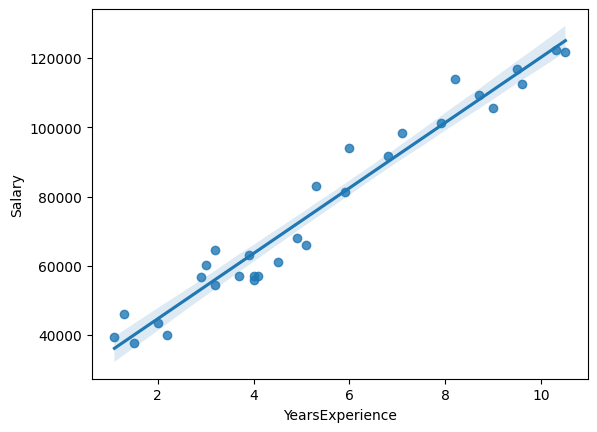

In [71]:
sns.regplot(x=data1["YearsExperience"],y=data1["Salary"])
plt.show()

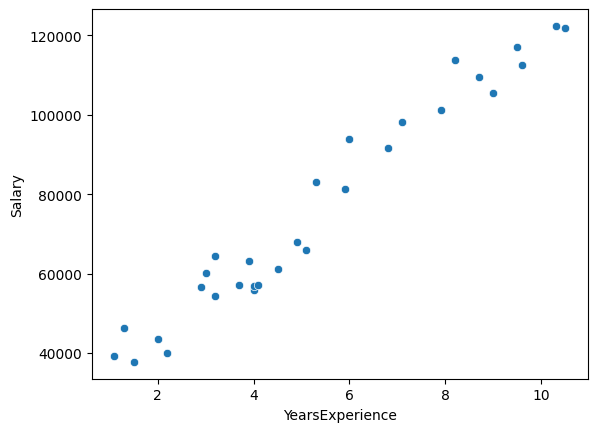

In [72]:
sns.scatterplot(x=data1["YearsExperience"],y=data1["Salary"])
plt.show()

Plotting the graph (before and after)

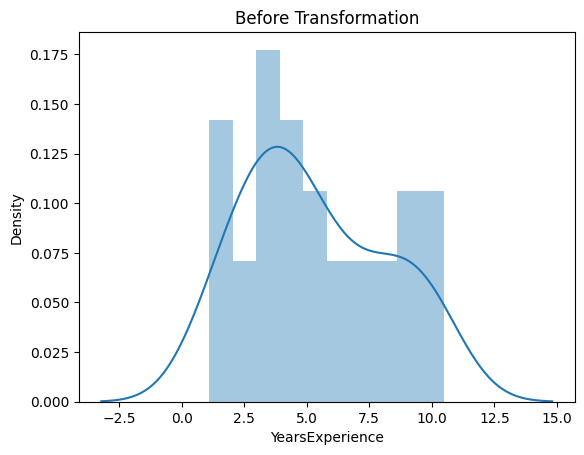

In [73]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(data1["YearsExperience"],bins=10)
plt.title("Before Transformation")
plt.show()


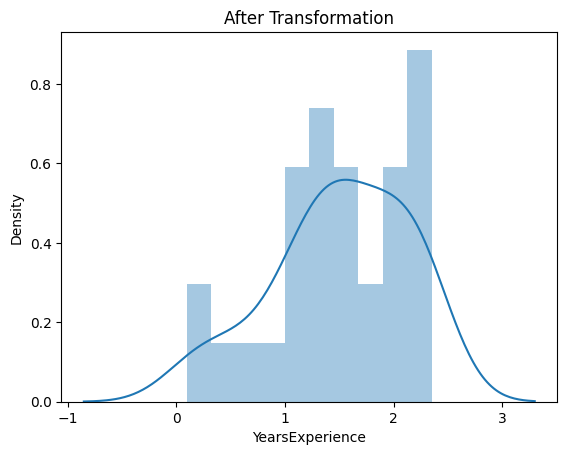

In [74]:
sns.distplot(np.log(data1["YearsExperience"]),bins=10)
plt.title("After Transformation")
plt.show()

Distribution Plot of both

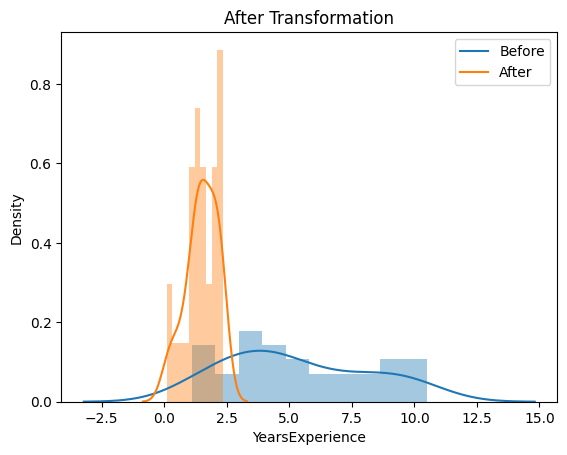

In [75]:
labels=["Before","After"]
sns.distplot(data1["YearsExperience"],bins=10)
plt.title("Before Transformation")
sns.distplot(np.log(data1["YearsExperience"]),bins=10)
plt.title("After Transformation")
plt.legend(labels)
plt.show()

Transformation of Data

(Log, Square root, cube root) Transformation

Text(0.5, 1.0, 'Cube Transformation')

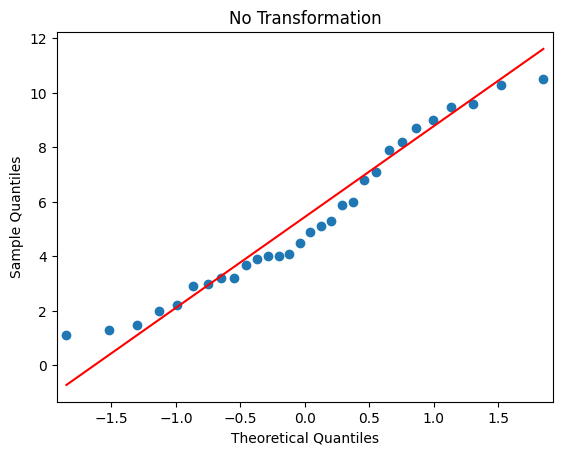

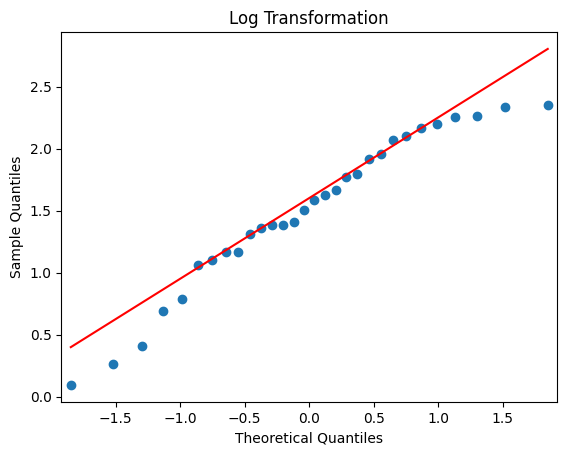

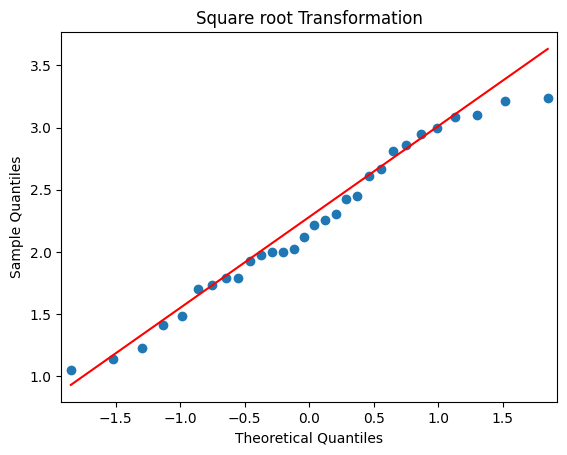

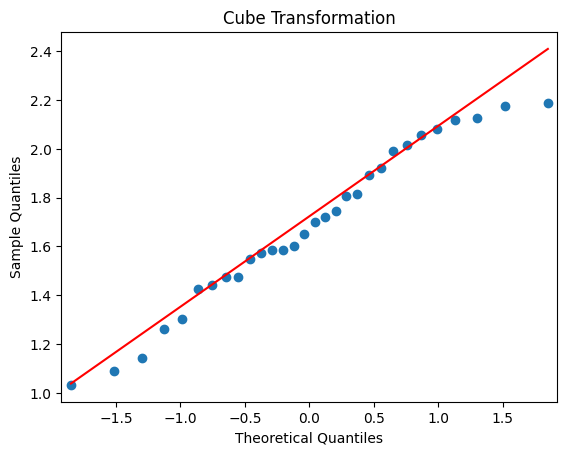

In [76]:
sa.qqplot(data1["YearsExperience"],line="q")
plt.title("No Transformation")
sa.qqplot(np.log(data1["YearsExperience"]),line="q")
plt.title("Log Transformation")
sa.qqplot(np.sqrt(data1["YearsExperience"]),line="q")
plt.title("Square root Transformation")
sa.qqplot(np.cbrt(data1["YearsExperience"]),line="q")
plt.title("Cube Transformation")

Building the model


In [77]:
model=smf.ols("Salary~YearsExperience",data=data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        10:55:22   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
model1=smf.ols("np.log(Salary)~np.log(YearsExperience)",data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           7.40e-16
Time:                        10:55:22   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
model2=smf.ols("np.sqrt(Salary)~np.sqrt(YearsExperience)",data=data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           7.58e-19
Time:                        10:55:22   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
model3=smf.ols("np.cbrt(Salary)~np.cbrt(YearsExperience)",data=data1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           6.37e-18
Time:                        10:55:22   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model Testing

In [81]:
model.params


Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [82]:
model.tvalues,model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [83]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Residual Analysis

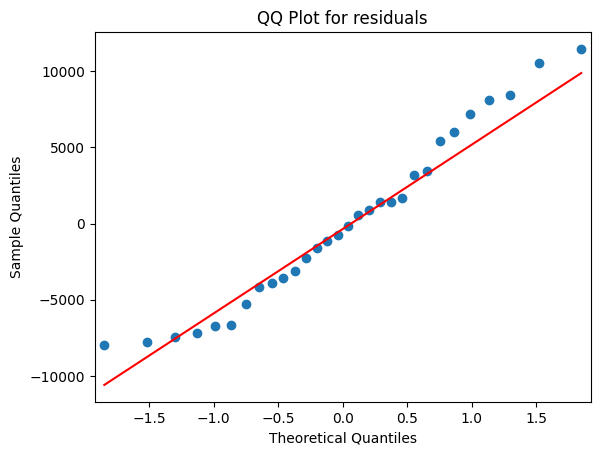

In [84]:
sa.qqplot(model.resid,line="q")
plt.title("QQ Plot for residuals")
plt.show()

Homoscedacity Plotting

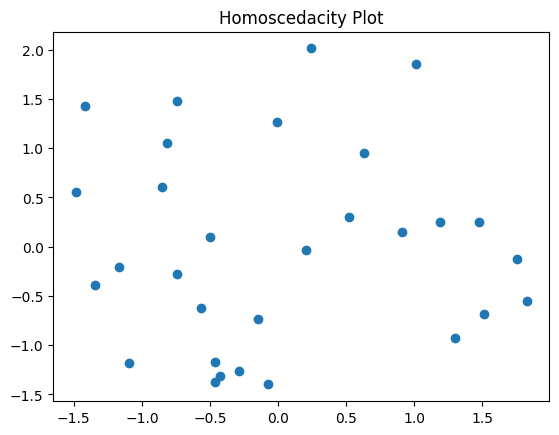

In [85]:
def plot_resid_values(val):
  return (val-val.mean())/val.std()
plt.scatter(plot_resid_values(model.fittedvalues),plot_resid_values(model.resid))
plt.title("Homoscedacity Plot")
plt.show()

Finding RSME values

Calculating the RSME values of different transformed values and choosing the best model

In [86]:
from sklearn.metrics import mean_squared_error
model1_pred_y =np.square(model1.predict(data1['YearsExperience']))
model2_pred_y =pow(model2.predict(data1['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(data1['YearsExperience']))
model1_rmse =np.sqrt(mean_squared_error(data1['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(data1['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(data1['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model1= 80520.74723278312 
model2= 24224960.011903845 
model3= 6.495462458718857e+20


Model Predictions

In [87]:
new_data=pd.DataFrame([3,4,6],columns=["YearsExperience"])
new_data

,YearsExperience
0,3
1,4
2,6


In [88]:
model.predict(new_data)

0    54142.087163
1    63592.049484
2    82491.974127
dtype: float64